In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics

In [3]:
df=pd.read_csv("Data/ForestRomania.csv")

In [4]:
df=df.drop("Unit",axis=1) #Dropping Unit feature as it has only one value

In [5]:
df["Year"]=pd.to_datetime(df.Year,format='%Y')
df["Year"]=df.Year.dt.year

In [6]:
df.head()

,Category,Region,Year,Value
0,Total,TOTAL,1990,6371.0
1,Total,TOTAL,1991,6367.6
2,Total,TOTAL,1992,6368.2
3,Total,TOTAL,1993,6366.9
4,Total,TOTAL,1994,6369.0


# One Hot

In [7]:
features=["Category","Region"] #Features to be converted by OneHotEncoder

one_hot = OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,
                               features)],
                             remainder="passthrough")

In [8]:
df=df.fillna(method='ffill')

In [9]:
X=df.drop("Value",axis=1)
Y=df["Value"]

In [10]:
X_transformed=transformer.fit_transform(X)

In [66]:
X_transformed=preprocessing.StandardScaler().fit_transform(X_transformed)

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [11]:
#Using X_transformed as X
X_train,X_test,Y_train,Y_test=train_test_split(X_transformed,Y,test_size=0.3,random_state=99)

# Algorithms

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#instantiating the models

lr = LinearRegression()
dtr = DecisionTreeRegressor()

In [13]:
rfr = RandomForestRegressor()

# Metrics function

In [14]:
def model_metrics(Y_test_metric,Y_preds_metric):
    print('MAE:', metrics.mean_absolute_error(Y_test_metric, Y_preds_metric))
    print('MSE:', metrics.mean_squared_error(Y_test_metric, Y_preds_metric))    

> **Metrics -** model performance: 
    > - Cross Validation
    > - Mean absolute error
    > - Mean square absolute error
    > - R Squared
    

    

# Linear Reg - OneHot

In [15]:
from datetime import datetime
start_time = datetime.now()
lr.fit(X_train,Y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:00:00.056917


In [21]:

start_time = datetime.now()
Y_preds_lr=lr.predict(X_test)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))



Duration: 0:00:00


In [16]:
    cross_val_score(lr,X_transformed,Y,cv=5).mean()

-8485.196578543259

In [17]:
model_metrics(Y_test,Y_preds_lr)

MAE: 184.01769532947029
MSE: 140389.35951695289


In [18]:
lr.score(X_test,Y_test)

0.7555003590786518

# Random Forest - OneHot

In [22]:
start_time = datetime.now()
rfr.fit(X_train,Y_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:10.920657


In [23]:
start_time = datetime.now()
Y_preds_rfr = rfr.predict(X_test)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:00:00.143468


In [24]:
model_metrics(Y_test,Y_preds_rfr)

MAE: 1.0185427280197374
MSE: 6.179537632293081


In [25]:
rfr.score(X_test,Y_test)

0.9999892378258769

In [26]:
    cross_val_score(rfr,X_transformed,Y,cv=5).mean()

-144.1535928125382

# SVR - OneHot

In [27]:
from sklearn.svm import SVR
svr=SVR()

In [29]:
start_time = datetime.now()
svr.fit(X_train,Y_train)


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:00:03.599121


In [30]:
start_time = datetime.now()
Y_preds_svr=svr.predict(X_test)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:00:00.919844


In [31]:
svr.score(X_test,Y_test)

-0.07825214911053502

In [32]:
    cross_val_score(svr,X_transformed,Y,cv=5).mean()

-5.824197641668337

In [33]:
model_metrics(Y_test,Y_preds_svr)

MAE: 276.07746071268633
MSE: 619122.0896725203


# Label Encoder

In [34]:
from sklearn import preprocessing

In [35]:
le=LabelEncoder()
# Splitting into Category and Region

le_category = le.fit_transform(df["Category"])
le_region = le.fit_transform(df["Region"])

In [36]:
# Putting the features together by creating a dataframe
X_transformed_le = pd.DataFrame({
    'Region':le_region,
    'Category':le_category,
    'Year':df["Year"]
})

In [37]:
X_transformed_le = preprocessing.StandardScaler().fit_transform(X_transformed_le)

In [38]:
X_train_le,X_test_le,Y_train_le,Y_test_le=train_test_split(X_transformed_le,Y,test_size=0.3)

# Linear Regression

In [39]:
start_time = datetime.now()
lr.fit(X_train_le,Y_train_le)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:00:00.193307


In [40]:
start_time = datetime.now()
Y_preds_lr = lr.predict(X_test_le)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:00:00.010679


In [41]:
model_metrics(Y_test_le,Y_preds_lr)

MAE: 319.04354816513865
MSE: 380361.52464073495


In [42]:
lr.score(X_test_le,Y_test_le)

0.05093456903055671

In [55]:
    cross_val_score(lr,X_transformed,Y,cv=5).mean()

-8485.196578543259

# Random Forest

In [43]:
start_time = datetime.now()
rfr.fit(X_train_le,Y_train_le)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:00:01.829460


In [45]:
start_time = datetime.now()
Y_preds_rfr = rfr.predict(X_test_le)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:00:00.102572


In [46]:
model_metrics(Y_test_le,Y_preds_rfr)

MAE: 0.9672444535743732
MSE: 5.466672016023169


In [47]:
model_metrics(Y_test_le,Y_preds_rfr)

MAE: 0.9672444535743732
MSE: 5.466672016023169


In [49]:
rfr.score(X_test_le,Y_preds_rfr)

1.0

In [61]:
    cross_val_score(rfr,X_transformed_le,Y,cv=5).mean()

-32.01070627443224

# SVR

In [51]:
start_time = datetime.now()
svr.fit(X_train_le,Y_train_le)


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:00:02.838094


In [52]:

start_time = datetime.now()
Y_preds_svr=svr.predict(X_test_le)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.645807


In [65]:
model_metrics(Y_test_le,Y_preds_svr)

MAE: 231.12859401854786
MSE: 414770.04522932915


In [57]:
svr.score(X_test_le,Y_preds_svr)

1.0

In [64]:
    cross_val_score(svr,X_transformed_le,Y,cv=5).mean()

-2.6967650509513605

# Check SVR for overfitting with validation

In [69]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_transformed_le, Y, test_size=0.2, random_state=1)

X_train_1, X_val, y_train_1, y_val = train_test_split(X_train_1, y_train_1, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [70]:
svr.fit(X_train_1,y_train_1)
y_preds_svr_valid = svr.predict(X_val)

In [71]:
model_metrics(y_val,y_preds_svr_valid)

MAE: 243.84222100686497
MSE: 528696.6538033817


In [72]:
svr.score(X_val,y_val)

-0.02872479556540486

In [73]:
y_preds_svr_test= svr.predict(X_test_1)


In [74]:
model_metrics(y_test_1,y_preds_svr_test)

MAE: 216.82227198679135
MSE: 374609.7026370795


In [75]:
svr.score(X_test_1,y_test_1)

-0.0245128082911219

In [79]:
    cross_val_score(svr,X_transformed_le,Y,cv=5).mean()

-2.6967650509513605

# Check RF for overfitting with validation

In [77]:
rfr.fit(X_train_1,y_train_1)
y_preds_rfr_valid = rfr.predict(X_val)
model_metrics(y_val,y_preds_rfr_valid)

MAE: 1.0225789149198403
MSE: 6.222489935265006


In [78]:
rfr.score(X_val,y_val)

0.9999878924338929

In [80]:
    cross_val_score(rfr,X_transformed_le,Y,cv=5).mean()

-31.624277862196116

In [81]:
y_preds_rfr_test = rfr.predict(X_test_1)

In [82]:
model_metrics(y_test_1,y_preds_rfr_test)

MAE: 1.1515865680837971
MSE: 9.701396271719023


# GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV


grid = {"n_estimators":[100,200,500],
          "max_depth":[5,15],
          "max_features":["auto","sqrt"],
          "min_samples_split":[6,10],
          "min_samples_leaf":[1,2]}


In [85]:
gs_rfr = GridSearchCV(estimator=rfr,
                           param_grid=grid,
                           cv=5,
                           verbose=2)

gs_rfr.fit(X_train_1,y_train_1)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  7.3min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [6, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [86]:
gs_rfr.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

In [90]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [88]:
gs_rfr_y_preds_valid = gs_rfr.predict(X_val)
gs_rfr_y_preds_test = gs_rfr.predict(X_test_1)

model_metrics(y_test_1,gs_rfr_y_preds_test)

MAE: 1.4994298506609116
MSE: 18.251311389811157


In [91]:
grid={'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8]
     }

In [92]:
gs_rfr = GridSearchCV(estimator=rfr,
                           param_grid=grid,
                           cv=5,
                           verbose=2)

gs_rfr.fit(X_train_1,y_train_1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] max_depth=4, max_features=auto, n_estimators=200 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   1.0s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   1.0s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   1.1s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   1.3s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   1.4s
[CV] max_depth=4, max_features=auto, n_estimators=500 ................
[CV] . max_depth=4, max_features=auto, n_estimators=500, total=   3.9s
[CV] max_depth=4, max_features=auto, n_estimators=500 ................
[CV] . max_depth=4, max_features=auto, n_estimators=500, total=   3.0s
[CV] max_depth=4, max_features=auto, n_estimators=500 ................
[CV] . max_depth=4, max_features=auto, n_estimators=500, total=   3.6s
[CV] max_depth=4, max_features=auto, n_estimators=500 ................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  5.6min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=2)

In [93]:
gs_rfr.best_params_

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}

In [94]:
gs_rfr_y_preds_valid = gs_rfr.predict(X_val)
gs_rfr_y_preds_test = gs_rfr.predict(X_test_1)

model_metrics(y_test_1,gs_rfr_y_preds_test)

MAE: 26.2645619302658
MSE: 2793.4657638606277


In [95]:
model_metrics(y_val,gs_rfr_y_preds_valid)

MAE: 26.486955446025892
MSE: 2917.1050124692797


In [96]:
from sklearn.model_selection import RandomizedSearchCV

In [97]:
grid = {"n_estimators":[10,100,200,500,1000,1200],
       "max_depth":[None,5,10,20,30],
       "max_features":["auto","sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}

In [100]:
rs_rfr = RandomizedSearchCV(estimator=rfr,
                           param_distributions=grid,
                           n_iter=30,
                           cv=5,
                           verbose=2)

rs_rfr.fit(X_train_1,y_train_1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.6s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   1.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   1.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.9s
[CV] n_estimators=100, min_samples_split=2, min_samp

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 12.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=30,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [106]:
rs_rfr.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [107]:
rs_rfr.score(X_test_1,y_test_1)

0.9999672570416167

In [108]:
rs_rfr_y_preds_valid = rs_rfr.predict(X_val)
rs_rfr_y_preds_test = rs_rfr.predict(X_test_1)

In [109]:
model_metrics(y_test_1,rs_rfr_y_preds_test)

MAE: 1.2411997990200407
MSE: 11.972353887793254


In [112]:
model_metrics(y_val,rs_rfr_y_preds_valid)

MAE: 1.069901750239763
MSE: 7.764950496230007


In [116]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [122]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")
    
    

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Toni\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

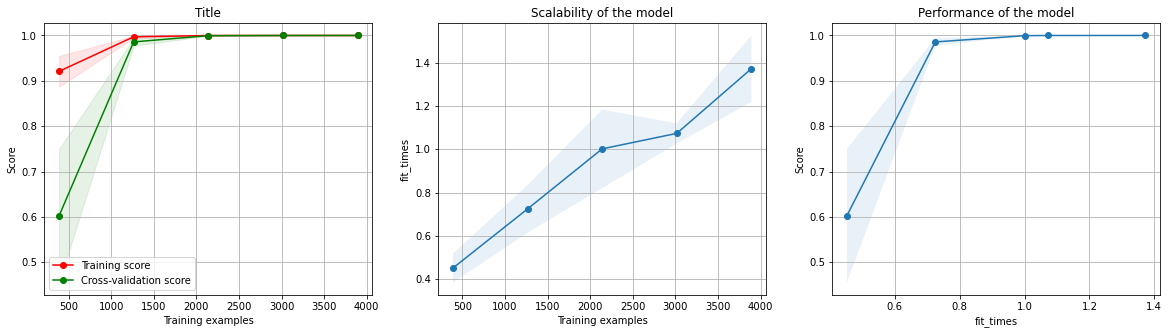

In [117]:
plot_learning_curve(estimator=rfr,title='X Train, Y Train',X=X_train_1,y=y_train_1)

<module 'matplotlib.pyplot' from 'C:\\Users\\Toni\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

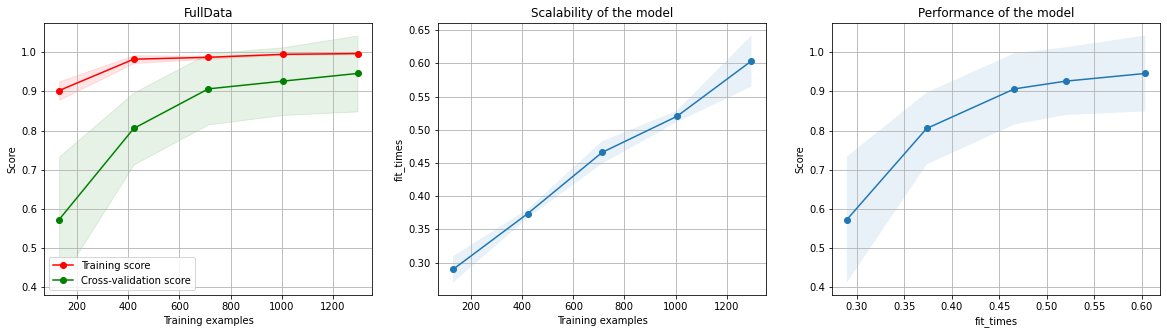

In [124]:
plot_learning_curve(estimator=rfr,title='FullData',X=X_val,y=y_val)

<module 'matplotlib.pyplot' from 'C:\\Users\\Toni\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

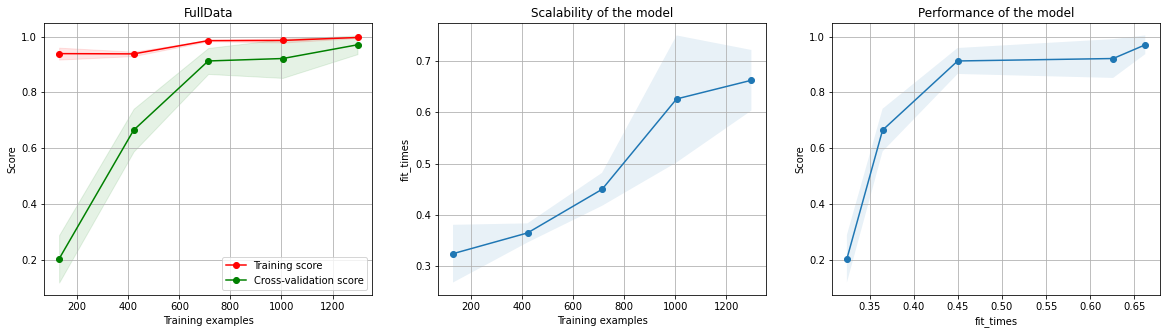

In [125]:
plot_learning_curve(estimator=rfr,title='FullData',X=X_test_1,y=y_test_1)

<module 'matplotlib.pyplot' from 'C:\\Users\\Toni\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

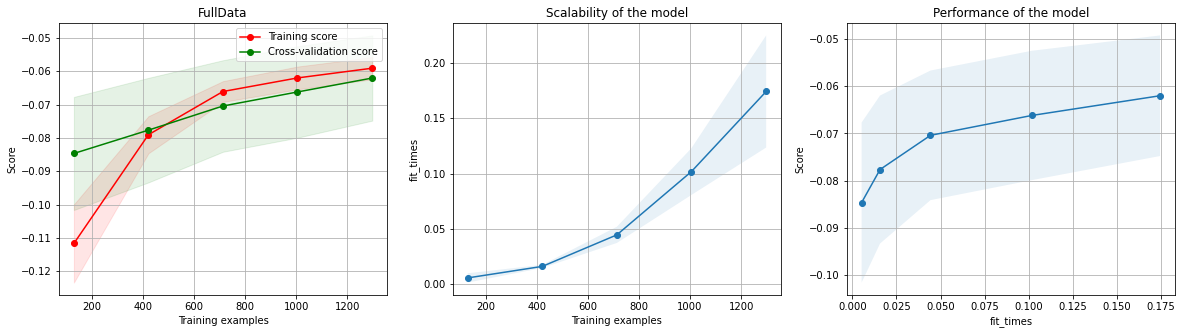

In [126]:
plot_learning_curve(estimator=svr,title='FullData',X=X_test_1,y=y_test_1)

<module 'matplotlib.pyplot' from 'C:\\Users\\Toni\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

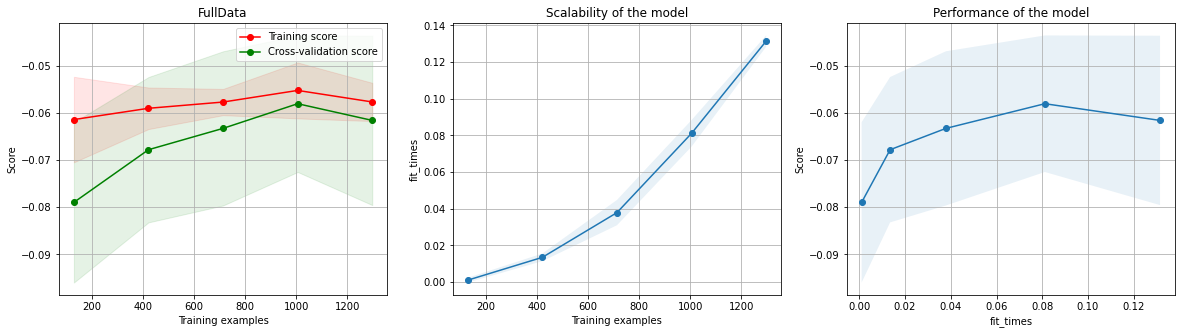

In [127]:
plot_learning_curve(estimator=svr,title='FullData',X=X_val,y=y_val)

In [130]:
df.corr

<bound method DataFrame.corr of      Category Region  Year   Value
0       Total  TOTAL  1990  6371.0
1       Total  TOTAL  1991  6367.6
2       Total  TOTAL  1992  6368.2
3       Total  TOTAL  1993  6366.9
4       Total  TOTAL  1994  6369.0
...       ...    ...   ...     ...
8106   Others  Timis  2015     1.9
8107   Others  Timis  2016     1.9
8108   Others  Timis  2017     1.9
8109   Others  Timis  2018     1.9
8110   Others  Timis  2019     2.0

[8111 rows x 4 columns]>

In [131]:
import seaborn as sns

In [134]:
xcor=pd.DataFrame(X_transformed_le)
xcor=xcor.corr()

In [139]:
df["Value"].corr()

TypeError: corr() missing 1 required positional argument: 'other'

<AxesSubplot:>

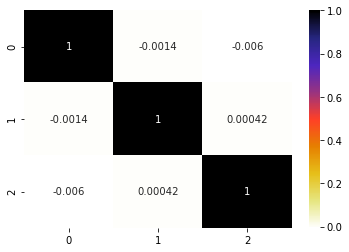

In [135]:
sns.heatmap(xcor,annot=True,cmap=plt.cm.CMRmap_r)

In [141]:
df.var()

Year         74.902830
Value    486178.126658
dtype: float64

In [143]:
pd.DataFrame(X_train_1)

,0,1,2
0,-0.206991,-0.001215,-0.755854
1,-1.027230,0.702560,-0.293646
2,-0.143896,1.406335,-1.102510
3,1.370392,-0.704989,0.168563
4,0.234676,1.406335,-0.524750
...,...,...,...
4861,-1.090326,-0.001215,0.630771
4862,-1.090326,1.406335,-0.640302
4863,1.622774,0.702560,-1.449166
4864,-1.531993,-0.704989,0.168563


Text(0.5, 1.0, 'Y Preds vs Y Actual')

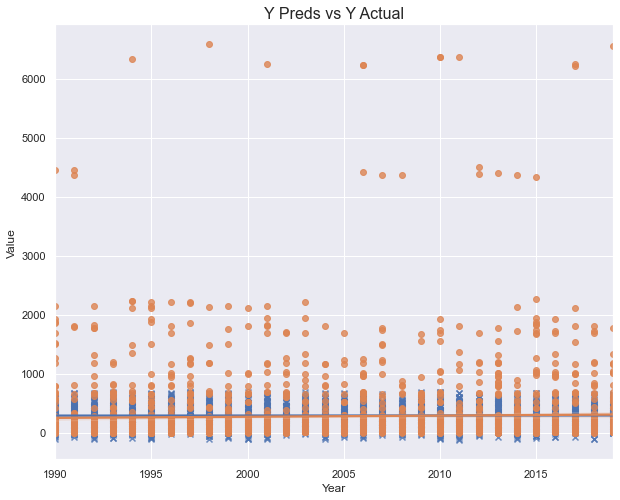

In [150]:
sns.set(rc={'figure.figsize':(10,8)})
sns.regplot(x=df["Year"][:len(Y_test_le)],y=Y_preds_lr, marker='x')
sns.regplot(x=df["Year"][:len(Y_test_le)],y=Y_test_le)
plt.title("Y Preds vs Y Actual",fontsize=16)